# <span style="color:maroon">**NRP Monitor Software**</span>

###### <span style="color:green">**Import modules and define utility functions**</span>

In [1]:
import pandas as pd
import numpy as np
import math
import glob
from matplotlib import pyplot as plt

In [2]:
# Utility Functions
def combine_dataframes(pattern, names, index_col, na_values, header=1, parse_dates=True, ignore_index=True):
    # creates a list of file pointers matching the pattern
    files = glob.glob(pattern)                        
    frames = []
   
    # iterate through each file pointer
    for f in files:
    
        # loads file into dataframe variable: df
        df = pd.read_csv(f, names=names, index_col=index_col, na_values=na_values,
                         header=header, parse_dates=parse_dates)                           
        
        # adds dataframe from df into list: frames
        frames.append(df)  
    
    # concatenate all dataframes in frames into a single dataframe
    return pd.concat(frames, ignore_index=ignore_index)    

def fillgaps(df,):
    s = []
    df.apply(lambda col: s.append(col.loc[col.first_valid_index():col.last_valid_index()].fillna(0)))
    return pd.DataFrame(s).transpose()

def df_eda(df):
    print(df.head(), "\n")
    print(df.tail(), "\n")
    print(df.shape, "\n")
    print(df.columns, "\n")
    print(df.info(), "\n")
    print(df.dtypes, "\n")
    print(df.describe())

###### <span style="color:green">**Load, clean, and shape data**</span>

In [21]:
# load daily manager data into a dataframe: mgr_data
col_names = ["date", "manager", "profit", "flow", "equity_sod", "roe"]
mgr_data = combine_dataframes("./data/manager_data.csv", names=col_names, index_col="date", na_values=" #N/A N/A ", ignore_index=False)

# pivot mgr_data into a tidy dataframes for all data columns
profits = fillgaps(pd.pivot_table(mgr_data, values="profit", index="date", columns="manager"))
flows = fillgaps(pd.pivot_table(mgr_data, values="flow", index="date", columns="manager"))
equity_sod = fillgaps(pd.pivot_table(mgr_data, values="equity_sod", index="date", columns="manager"))
roes = fillgaps(pd.pivot_table(mgr_data, values="roe", index="date", columns="manager"))

In [26]:
# load daily target price data: tpx_data
cols = ["date", "ticker", "close_price", "target_price", "exposure", "manager"]
tpx_data = combine_dataframes("./data/target_prices.csv", names=cols, index_col=["manager", "ticker", "date"], na_values=" #N/A N/A ", ignore_index=False).sort_index()
tpx_data = tpx_data[tpx_data.exposure.notnull()]
tpx_data = tpx_data[tpx_data.exposure != 0]

# pivot mgr_data into a tidy dataframes for all data columns
#profits = fillgaps(pd.pivot_table(mgr_data, values="profit", index="date", columns="manager"))
#flows = fillgaps(pd.pivot_table(mgr_data, values="flow", index="date", columns="manager"))
#equity_sod = fillgaps(pd.pivot_table(mgr_data, values="equity_sod", index="date", columns="manager"))
#roes = fillgaps(pd.pivot_table(mgr_data, values="roe", index="date", columns="manager"))

In [27]:
tpx_data.to_csv("deletesoon.csv")

###### <span style="color:green">**Generate basic analytical dataframes**</span>

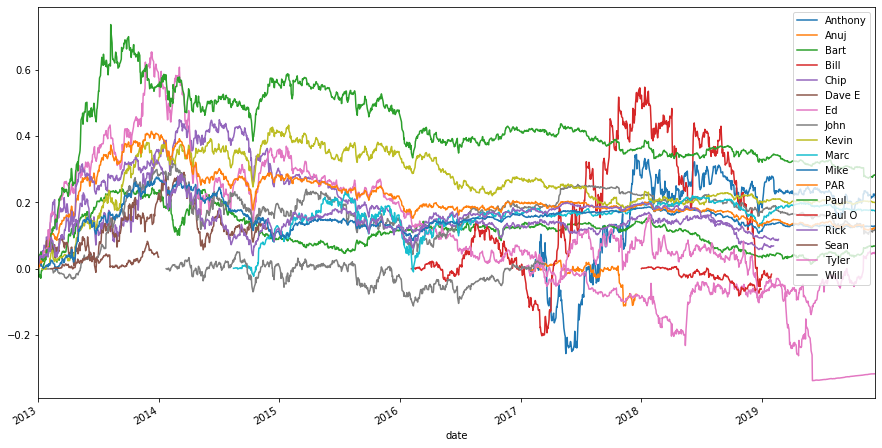

In [51]:
# roe analytics dataframes
days_rc = roes.applymap(lambda x: 0 if math.isnan(x) else 1).cumsum()
roes_af = days_rc.applymap(lambda x: 252/x if x >= 252 else 1)
roes_rc = (1+roes).cumprod() - 1
roes_ac = (1+roes_rc)**roes_af - 1

roes_ac.plot(figsize=(15,8))
plt.show()

###### <span style="color:green">**Exploratory data analysis**</span>

In [5]:
selected_df = profits_test
#df_eda(selected_df)
#selected_df.to_csv("deletesoon.csv")

NameError: name 'profits_test' is not defined

In [ ]:
print(df.ticker.value_counts(dropna=False), "\n")
print(df["ticker"].value_counts(dropna=False), "\n")     # same as previous lines
print(df[df.volume > 1000000000], "\n")                  # basic filtering - version 1
print(df[df["volume"] > 1000000000])                     # basic filtering - version 2

In [ ]:
import matplotlib.pyplot as mpl
%matplotlib inline

# plot histogram of volume - note the use of logarithmic transforms of both the x and y axis
df.volume.plot(kind="hist", rot=70, logx=True, logy=True, figsize=(12, 6))

In [ ]:
# Boxplots are great when you have a numeric column that you want to compare across different categories.
df.boxplot(column="volume", by="ticker", rot=90, figsize=(12,6))

In [ ]:
# When you want to visualize two numeric columns, scatter plots are ideal.
# Notice the fan shapped pattern - why is that the case?
df[df["ticker"]=="MU"].plot(kind="scatter", x="close", y="cap", rot=90, figsize=(12,6))

###### <span style="color:green">**Miscellaneous and Supplementary**</span>

In [ ]:
# roes.profit = pd.to_numeric(roes.profit, errors="coerce")
# roes.flow = pd.to_numeric(roes.flow, errors="coerce")
# roes.equity_sod = pd.to_numeric(roes.equity_sod, errors="coerce")
# roes.roe = pd.to_numeric(roes.roe, errors="coerce")

# profits["Total"] = profits.apply(np.nansum, axis=1) - profits["PAR"]
